# 1. Descripción del problema

**Entrada:** Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida:** Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$ de tal manera que $[a_1'\leq a_2'\leq...\leq a_n']$


Los problemas de ordenamiento siempre han existido en el ambito de la informática, por lo que continuamente se están buscando nuevos algoritmos que sean cada vez mas eficientes y/o estables. Dentro de aquellos algoritmos estables se encuentra el **MergeSort**, desarrollado en el año 1945 por John Von Neumann, que mediante el clásico método de **divide y vencerás** puede resolver un problema de ordenamiento en un tiempo más que aceptable.

# 2. Descripción del algoritmo

El algoritmo **MergeSort** recibe de entrada una secuencia de números y los retorna de menor a mayor. Este algoritmo utiliza el principio de **divide y vencerás**, en el que básicamente divide el arreglo en sub-arreglos más pequeños para así realizar comparaciones mas fácilmente mediante la recursividad.

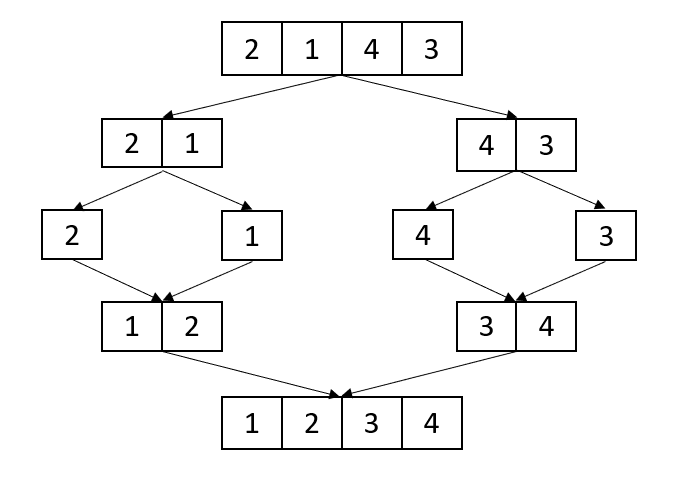

El algoritmo realiza la siguiente secuencia lógica:

1. **Divide:** La secuencia de números de entrada se divide en dos sub-arreglos más pequeños, es decir, se separa en forma de `n/2`
2. **Ordena:** Cada sub-arreglo se ordena de manera recursiva usando MergeSort.
3. **Combina:** Al tener dos sub-arreglos ordenados se realiza la combinación utilizando una función **merge**.


## 2.1 Función Merge

Esta función se encarga de crear un arreglo ordenado a partir de dos sub-arreglos ya **ordenados**.

La función recibe cuatro parámetros: **A, p, q, r**.
**A** corresponde al arreglo mientras que **p, q y r** son índices. **p** corresponde el inicio, **q** el medio y **r** el final del arreglo. Además la función contendrá la variable **k** que corresponde al índice que se usará en el nuevo arreglo combinado, y dos variables **indiceIzq** y **indiceDer**, que servirán para recorrer el sub-arreglo izquierdo y derecho respectivamente.

Como la función toma dos sub-arreglos ya ordenados, entonces `A[p..q]` y `A[q+1..r]` lo están. La función los combina y genera un arreglo ordenado `A[p..r]`.

La forma que usa la Función para combinar los sub-arreglos es ir comparando cada elemento de ellos. Cuando se obtiene el menor elemento se ingresa en nuestro nuevo arreglo combinado. Se Repite hasta que uno de los sub-arreglos quede vacío, y luego se agregan directamente los elementos del otro sub-arreglo en el nuevo arreglo ordenado.




## 2.2 Ejemplo

Veamos el siguiente ejemplo básico. Consideremos los sub-arreglos $[2,5]$ y $[1,8]$

En esta ocasión utilizaremos el nombre de **L** y **R** para el sub-arreglo izquierdo y derecho respectivamente. Tomemos que **i** corresponde al índice de **L**, y **j** al índice de **R**.

1 es menor que 2, entonces en nuestro arreglo principal agregamos el 1 y aumentamos una unidad a nuestra variable **j** para "eliminarlo".

$[1,..]$

Ahora comparamos el número 2 con el 8. 2 es menor que 8, entonces lo agregamos al arreglo principal y aumentamos la variable **i** para "eliminarlo"

$[1,2,..]$

Ahora comparamos el número 5 con el 8, 5 es menor que 8, entonces lo agregamos al arreglo principal y aumentamos la variable **i** para "eliminarlo".

[1,2,5,..]

Por último, como ya no quedan elementos para comparar el arreglo **L**, se copian todos los elementos restantes del arreglo **R** en el arreglo principal.

[1,2,5,8]

Arreglo Ordenado.




# 3. Código

In [525]:
# ALGORITMO MERGESORT

# p = inicio(indice) ; r = tamaño(indice) ; q = mitad(indice)

def merge(A,p,q,r,verbose):

  global comp
  #Sub-arreglos 
  arregloIzq = A[p:q+1]
  arregloDer = A[q+1:r+1]

  indiceIzq = 0      #Índice sub-arreglo izquierdo
  indiceDer = 0      #Índice sub-arreglo derecho

  
  if verbose == True:
      print("")
      print(A[p:q+1],A[q+1:r+1])
  #ciclo para recorrer arreglo principal
  for k in range(p,r+1):
    
    #Copiar sobras de sub-arreglos en el arreglo principal
    if indiceDer == len(arregloDer):
      for k in range(k,r+1):
        A[k] = arregloIzq[indiceIzq]
        comp += 1 
        indiceIzq += 1
      break

    if indiceIzq == len(arregloIzq):
      for k in range(k,r+1):
        A[k] = arregloDer[indiceDer]
        comp += 1 
        indiceDer += 1
      break

    #Comparar sub-arreglos y dejar el menor elemento en el arreglo principal
    comp += 1  #contador comparaciones
    if (arregloIzq[indiceIzq] <= arregloDer[indiceDer]):
      A[k] = arregloIzq[indiceIzq]
      indiceIzq += 1
    else:
      A[k] = arregloDer[indiceDer]
      indiceDer += 1
    if verbose == True and arregloIzq[indiceIzq-1] > arregloDer[indiceDer-1]:
      print("Merge: ",colored(A[p:r+1],"blue"),"   Comparando...","\n")

  if verbose == True:
      print("Merge: ",colored(A[p:r+1],"green"),"  ¡Ordenado!","\n")
    
  
def mergeSort(A,p,r,comparacion,verbose):
  
  global comp,contRe
  contRe += 1

  if p == r: return #Cuando el arreglo solo tiene un elemento lo retorna
  
  q = int((p+r)/2)  #Medio del arreglo

  if verbose == True:
    print("¡MergeSort! ",colored(A[p:q+1],"red"),colored(A[q+1:r+1],"red"))
   
  mergeSort(A,p,q,comparacion,verbose)  #Ordenar sub-arreglo izquierdo  

  mergeSort(A,q+1,r,comparacion,verbose)#Ordenar sub-arreglo derecho
  
  merge(A,p,q,r,verbose)    #Combinar los dos sub-arreglos

# Ejemplo:
global comp,contRe
A = [2,5,1,4]
print("input array:",A)
indiceInicio = 0
comp = 0
contRe = 0
verbose = False
mergeSort(A,indiceInicio,len(A) - 1,comp,verbose)
print("output array: ",A)
print("Comparaciones: ",comp)
print("Llamadas recursivas: ",contRe)



input array: [2, 5, 1, 4]
output array:  [1, 2, 4, 5]
Comparaciones:  8
Llamadas recursivas:  7


## 3.1 Ejecución del algoritmo paso a paso `verbose = True`

In [529]:
import random
a = random.sample(range(1,20),4)
print("input array: ",a,"\n")

mergeSort(a,0,len(a)-1,comp,verbose = True)

print("\noutput array: ",a)


input array:  [16, 13, 18, 4] 

¡MergeSort!  [16, 13] [18, 4]
¡MergeSort!  [16] [13]

[16] [13]
Merge:  [13, 13]    Comparando... 

Merge:  [13, 16]   ¡Ordenado! 

¡MergeSort!  [18] [4]

[18] [4]
Merge:  [4, 4]    Comparando... 

Merge:  [4, 18]   ¡Ordenado! 


[13, 16] [4, 18]
Merge:  [4, 16, 4, 18]    Comparando... 

Merge:  [4, 13, 4, 18]    Comparando... 

Merge:  [4, 13, 16, 18]    Comparando... 

Merge:  [4, 13, 16, 18]   ¡Ordenado! 


output array:  [4, 13, 16, 18]


En color rojo están los subarreglos generados por el **MergeSort**. En azul son los arreglos que están haciendo comparaciones. En color verde están los arreglos ya ordenados

## 4. Propiedades del algoritmo

A continuación se mostrarán algunas propiedades propias del algoritmo **MergeSort**, tales como su **tiempo de ejecución** y **correctitud**. 


### 4.1 Correctitud (Función Merge)

**Teorema (propiedad invariante de bucle)**

La función merge genera un arreglo con los mismos elementos de los **subarreglos** de entrada ordenados de menor a mayor.

Para comprobar que la propiedad es correcta, es necesario que el algoritmo cumpla con las pruebas de **inicialización** y **mantención**. Para ello tomaremos un ejemplo.

Se tiene un arreglo de entrada (A) que formarán 2 sub-arreglos $arregloIzq$ y $arregloDer$, con sus elementos ya ordenados. Además de una variable **k** para recorrer el arreglo **A**.

Para efectos prácticos definiremos los índices de las variables $indiceIzq = i$ e $indiceDer = j$

---

**Inicialización**

Antes de la primera iteración, el arreglo $A[p..r]$ contendrá los **r** elementos mas pequeños de los sub-arreglos $arregloIzq[p..q]$ y $arregloDer[q+1..r]$. Además, es posible declarar que $arregloIzq[i]$ y $arregloDer[j]$ son los elementos más pequeños de sus sub-arreglos respectivos que no han sido traspasados al arreglo de entrada. Por lo que aquellos elementos ya se encuentran ordenados.

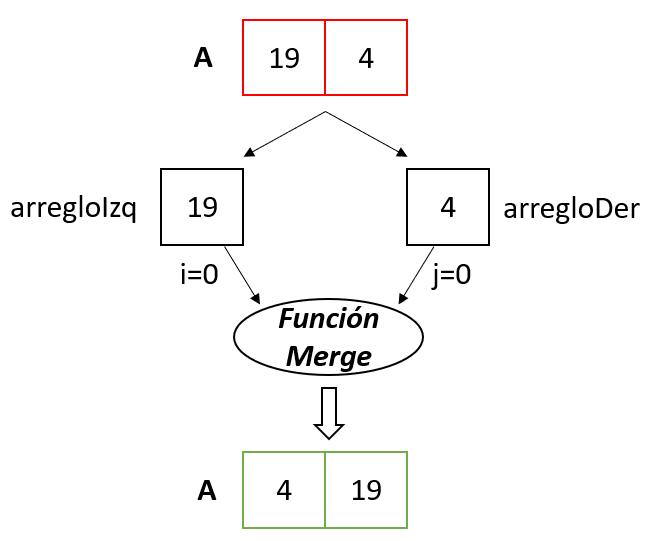



**Mantención**

Comparemos los elementos de los subarreglos $arregloIzq$ y $arregloDer$. Sabemos que aquellos sub-arreglos contienen los elementos más pequeños que no han sido reemplazados en el arreglo **A**, entonces al hacer la comparación, reemplazamos el elemento más pequeño en el arreglo principal. Se aumenta en una unidad el índice **i** o **j** al igual que el índice **k**, iniciando otra iteración. De está manera se mantiene el bucle invariante.

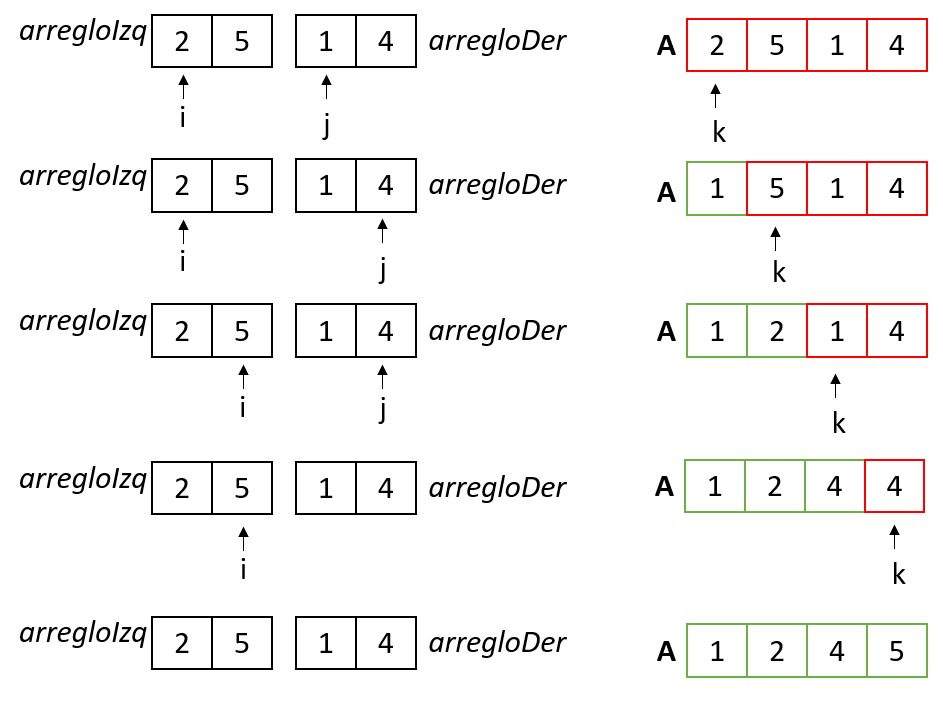






### 4.2 Correctitud (Función MergeSort)

**Inducción matemática**

Para probar la correctitud, utilizaremos el metodo de inducción matemática, básicamente consisten en que si queremos probar alguna declaración $P(n)$ debemos probar un par de condiciones.

1. Probar un caso base para $P(n)$ como $P(1)$
2. Probar que si $P(m)$ es verdad para m < n, entonces P(n) también lo es.

Probaremos un caso base para el **MergeSort**, como sabemos, el algoritmo toma **n** elementos de entrada y los retorna de manera ordenada de menor a mayor. Entonces, podemos tomar $P(1)$ cuando **n** = 1. De esta forma cuando el arreglo solo tiene un elemento, ya está ordenado. por lo tanto, $P(1)$ es verdad.

Para el otro caso, también sabemos que el algoritmo divide dos veces el arreglo de tamaño **n** en subarreglos. Tenemos que `m = n/2` y `m = n/2` y se ordenan usando **MergeSort**. Entonces como m es menor a n, comprobamos que el caso inductivo también es verdad.

La función merge se encarga de juntar los dos subarreglos y retorna un arreglo ordenado con los mismos elementos de los subarreglos, ya con eso podemos comprobar que **MergeSort es correcto.**

### 4.3 Tiempo de ejecución

El algoritmo posee una peculiaridad, y es que sus complejidades temporales en el peor y mejor caso son iguales. $O(n \log n)$ 

Podemos explicar el porque de esta complejidad usando un **árbol de recurrencia.**

Reemplazemos las complejidades $O(1)$ por una constante **c** y las complejidades $O(n)$ por $c*n$. Tendremos:

$T(n) = \begin{cases}
  c  & n \text{ is small} \\
  2 T(n/2) + c \cdot n & \text{ otherwise}
\end{cases}$

Entonces, tendremos un tiempo **n** en el que aquella **c** de arriba corresponde a $O(1)$, cuando el arreglo tiene un solo valor. Y la suma inferior a las operaciones que realiza el algoritmo.

Con ello, podemos crear un árbol de recuersión para representar la recurrencia. Tendremos $T(n)=2T(n/2)+c*n$, ya que cada vez realizamos dos subdivisiones de la forma `n/2`, sumado con un **n** multiplicado por una constante. 

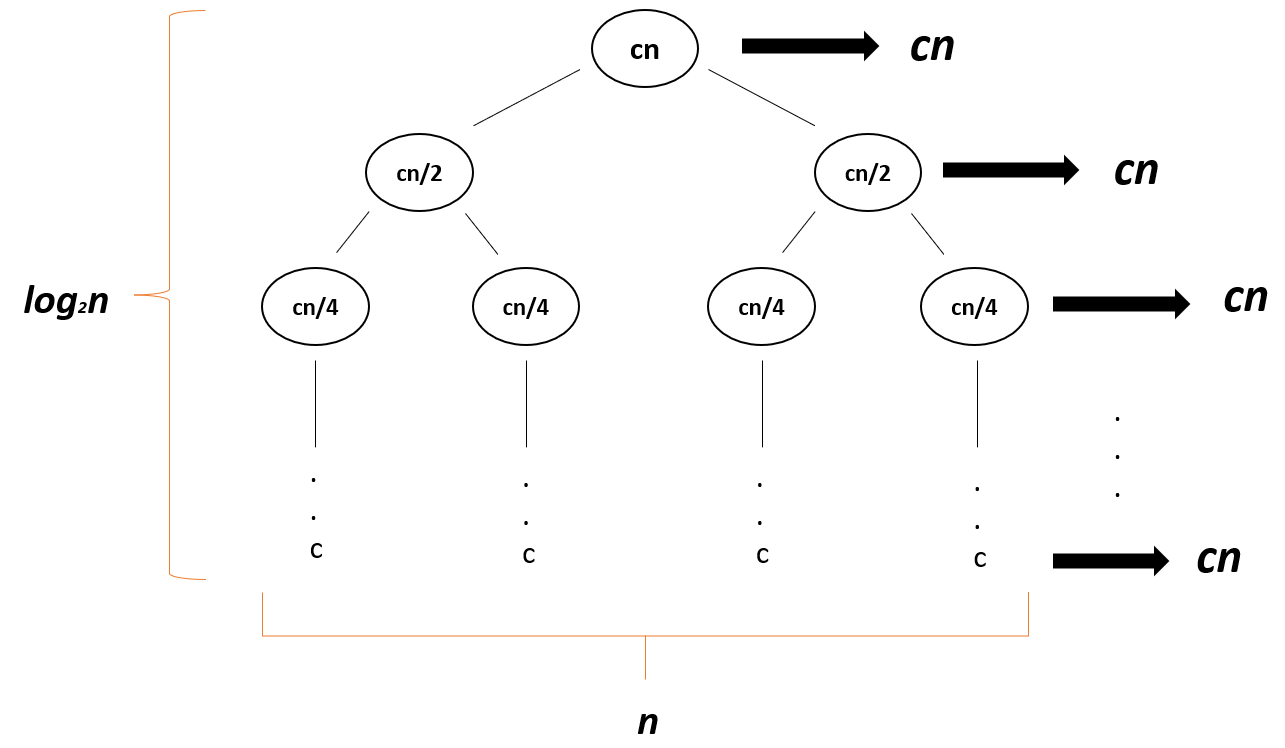

Como se observa en la imagen, los tiempos de cada nivel del árbol de recurrencia son $cn$ junto con una altura de $\log_2 n$, entonces la suma total de ambos tiempos nos deja una complejidad de $O(n \log n)$ 

## 5. Experimentos

A continuación se realizarán dos experimentos en los que se analizarán y explicaran sus comportamientos. Los cuales son:
1. Comparar el número de comparaciones con el mejor y peor caso teóricos.
2. Comparar el algoritmo MergeSort con el insertionSort. 

### 5.1 Número de comparaciones


Observaremos la cantidad de comparaciones que realiza el algoritmo en dos casos teóricos:

* Peor caso teórico $O(n \log n)$ 
* Mejor caso teórico $O(n \log n)$ 

Estableceremos un tamaño del problema de $n \in [5,24]$. El arreglo de entrada tendrá números entre el 1 y 100.

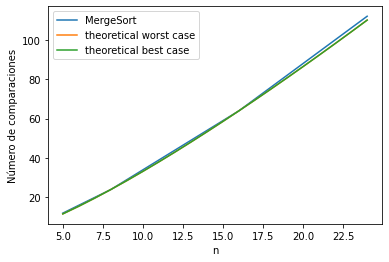

In [407]:
import matplotlib.pyplot as plt
import random
import math

x = [n for n in range (5,25)]
y = []

# Peor y mejor caso
y1 = [n * math.log2(n) for n in range (5,25)] 
y2 = [n * math.log2(n) for n in range (5,25)]

for n in range(5,25):
  comp = 0
  a = random.sample(range(1, 100), n)
  mergeSort(a,0,len(a)-1,comp,verbose = False)
  y.append(comp)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

Como se señaló anteriormente, el peor y mejor caso teóricos poseen un complejidad temporal idéntica. En el gráfico podemos observar como ambos casos están superpuestos, además, vemos las comparaciones realizadas por el algoritmo **MergeSort** que también está sobre los otros dos casos. Esto se explica ya que si bien un arreglo de **n** elementos se encuentra ya ordenado o bien desordenado, eso no importará a la hora de realizar comparaciones. El algoritmo dividirá el arreglo en la forma `n/2` independientemente del orden de sus elementos de entrada.



### 5.2 MergeSort vs InsertionSort

Compararemos los algoritmos **MergeSort** e **InsertionSort**

Estableceremos un tamaño del problema de $n \in [5,499]$. El arreglo de entrada tendrá números entre el 1 y 1000.

**InsertionSort:**

In [350]:
import random
from termcolor import colored
import copy


def insertion_sort(a,verbose=False):
  n = len(a)
  contador = 0 #contador de comparaciones
  aux = 0
  respaldo = 0

  if verbose == True: print ("Input array: ",a)

  for i in range (1,len(a)):
    sorted = True
    respaldo = i
    
    if verbose == True: print("\nPasada ",i)
    key = a[i]

    for k in range (i - 1,-1,-1):
      aux += 1

      if a[k] < key:
        contador += 1
        a[k + 1] = key
        break

      #Verbose
      if verbose == True: 
        if sorted == False:
          i -= 1
        print(str(a[:i])[1:-1],",",colored(f"{str(a[i:i+1])[1:-1]}","red"),str(a[i+1:])[1:-1])
        sorted = False

      a[k + 1] = a[k]
      a[k] = key

    i = respaldo

    if key < a[0]:
      a[0] = key
    

    #Verbose
    if verbose == True: 
      print("\nÚltimo Cambio:")
      #print(str(a)[1:-1])
      print(colored(f"{str(a[:i+1])[1:-1]}","blue"),str(a[i + 1:])[1:-1])

  if verbose == True: print("\noutput array:",a)

  aux = aux / (n - 1)
  
  return a,contador,aux



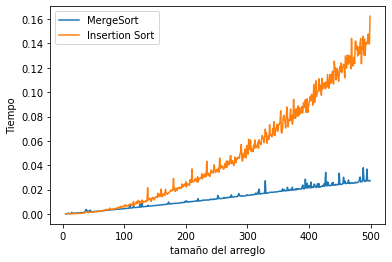

In [405]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]
ix=[]; by=[]


for n in range(5,500):
  comp = 0
  p = 0
  a = random.sample(range(1, 1000), n)
  r = len(a)-1

  z = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a},{p},{r},{comp},{verbose})", repeat=1, number=10)

  ix.append(n)
  by.append(z)


  t = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(ix,by)

plt.plot(x,y)


plt.legend(["MergeSort","Insertion Sort"])


plt.xlabel('tamaño del arreglo')
plt.ylabel('Tiempo')
plt.show()

Como podemos observar, los tiempos del algoritmo **MergeSort** son mucho menores que el del **InsertionSort**, es decir, **MergeSort** tarda menos en realizar un ordenamiento. Se puede apreciar lo sumamente útil que puede llegar a ser el término **divide y vencerás**.

Tambien podriamos observar el comportamiento del algoritmo **BubbleSort** e **InsertionSort** con el **MergeSort**. Para ello haremos otra gráfica.

**BubbleSort:**


In [409]:
import random
from termcolor import colored
import copy

def bubble_sort(a, verbose=False):
    n = len(a)
    T = 0 #contador de comparaciones

    if verbose == True: print("input array:",a)

    for i in range(1,n+1):
        if verbose == True: print("\nPasada",i)
        # Flag que indica si el arreglo ya se encuentra ordenado
        already_sorted = True

        # Se recorre el arreglo
        for j in range(n - i):
            T +=1
            if a[j] > a[j + 1]:
                # Si el elemento es mayor al siguiente se intercambia
                a[j], a[j + 1] = a[j + 1], a[j]
                if verbose == True: 
                  print(str(a[:j])[1:-1],",",colored(f"{str(a[j:j+2])[1:-1]}","red"),",",str(a[j+2:])[1:-1])

                already_sorted = False

        if already_sorted == False and verbose == True: 
           print("\nAl finalizar pasada:")
           print(str(a[:n-i])[1:-1],",",colored(f"{str(a[n-i:])[1:-1]}","blue"))

        if already_sorted:
            if verbose == True: print("is sorted!")
            break

    if verbose == True: print("\noutput array:",a)

    return a, T


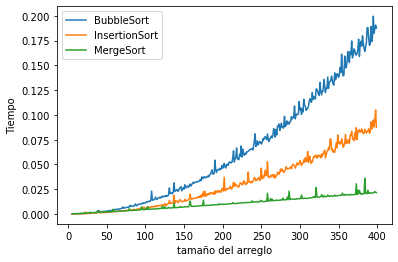

In [418]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]
ix=[]; by=[]
Ix=[]; By=[]


for n in range(5,400):
  comp = 0
  p = 0
  a = random.sample(range(1, 1000), n)
  r = len(a)-1

  z = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({a})", repeat=1, number=10)

  ix.append(n)
  by.append(z)

  f = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({a})", repeat=1, number=10)

  Ix.append(n)
  By.append(f)

  t = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a},{p},{r},{comp},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(ix,by)
plt.plot(Ix,By)
plt.plot(x,y)


plt.legend(["BubbleSort","InsertionSort","MergeSort"])


plt.xlabel('tamaño del arreglo')
plt.ylabel('Tiempo')
plt.show()

Se puede apreciar que el tiempo de ordenamiento del **BubbleSort** e **InsertionSort** son superiores al **MergeSort**.